/var/folders/m2/xxfzg66d7d72n8x4mh4qjctr0000gn/T/ipykernel_30369/3875554284.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['INSTALL_YEAR'] = df_valid['INSTALL_DATE'].dt.year


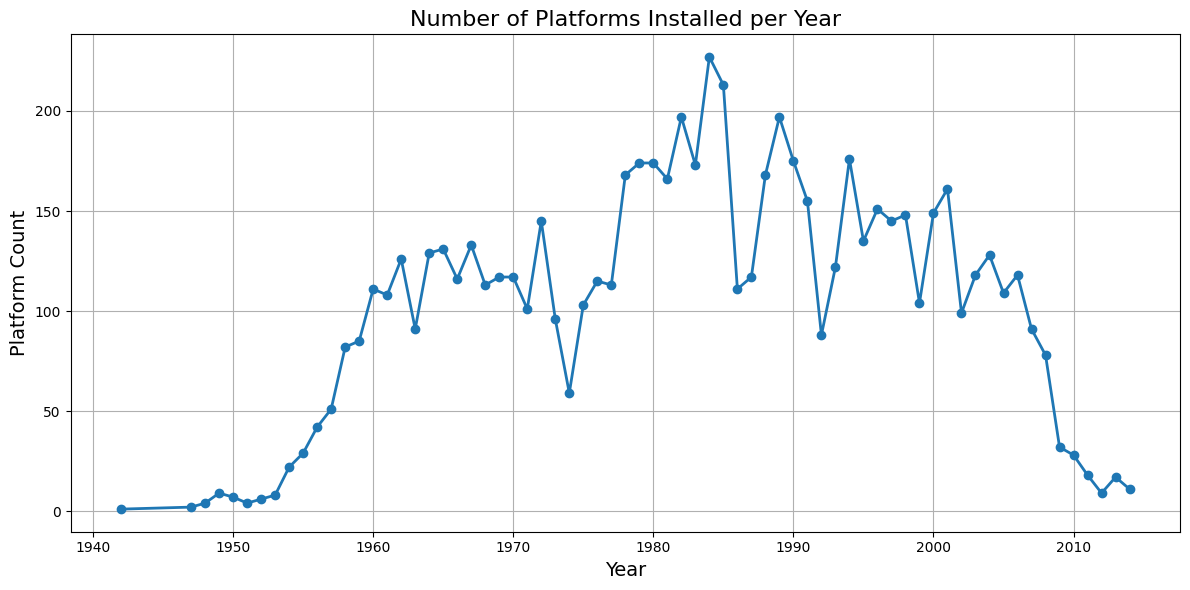

<Figure size 1400x700 with 0 Axes>

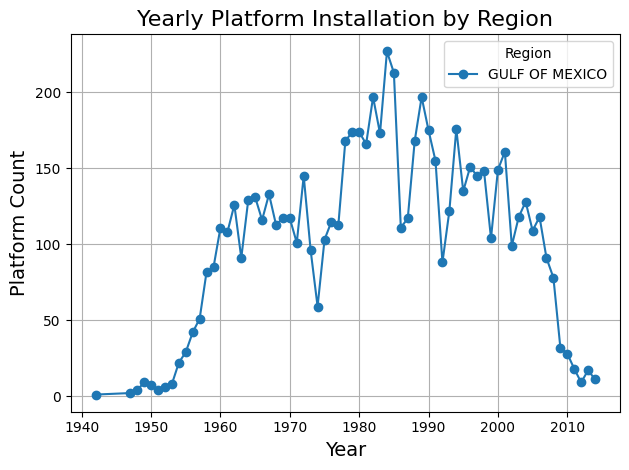

<Figure size 1400x700 with 0 Axes>

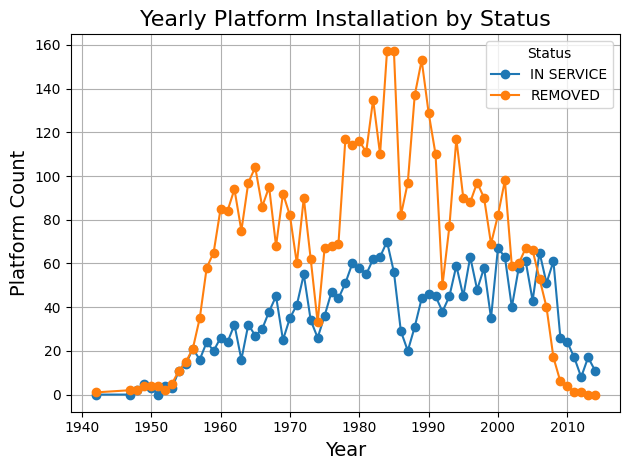

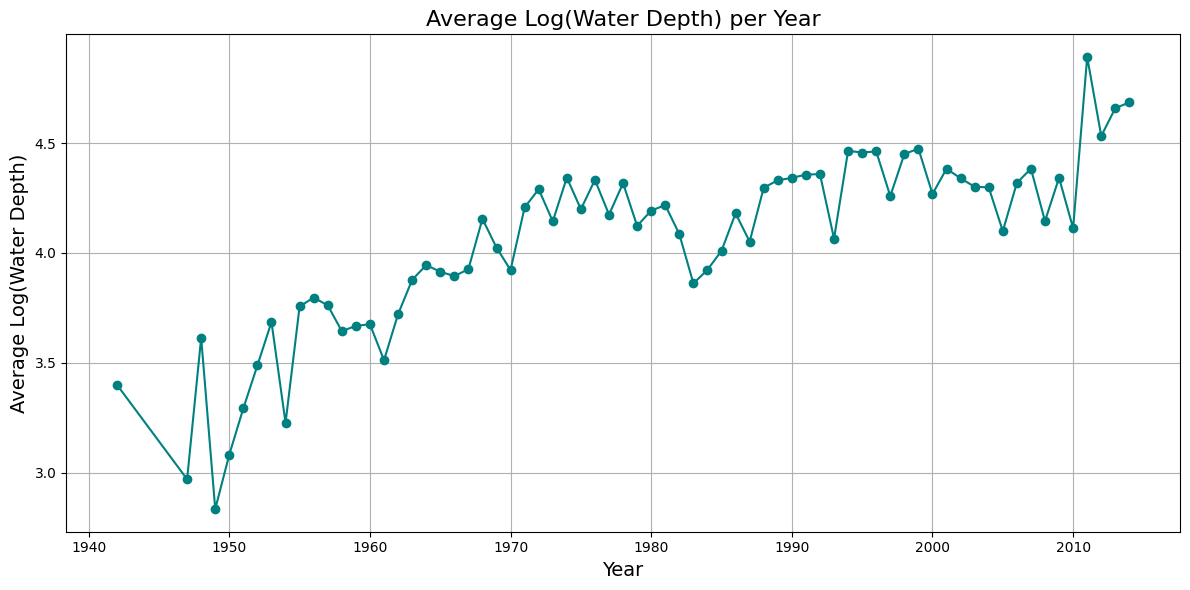

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("../data/platforms_logdepth.csv")

# -----------------------------
# Data Preprocessing
# -----------------------------
# Convert INSTALL column to datetime
df['INSTALL_DATE'] = pd.to_datetime(df['INSTALL'], errors='coerce')

# Drop records with invalid dates
df_valid = df.dropna(subset=['INSTALL_DATE'])

# Extract year from date
df_valid['INSTALL_YEAR'] = df_valid['INSTALL_DATE'].dt.year

# Filter reasonable year range (1940–2025)
df_valid = df_valid[(df_valid['INSTALL_YEAR'] > 1940) & (df_valid['INSTALL_YEAR'] <= 2025)]

# -----------------------------
# Installation count per year
# -----------------------------
install_counts = df_valid['INSTALL_YEAR'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(install_counts.index, install_counts.values, marker='o', linewidth=2)
plt.title("Number of Platforms Installed per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Platform Count", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("../data/plot_installation_count_per_year.png")
plt.show()

# -----------------------------
# Installations by Region per Year
# -----------------------------
region_year_group = df_valid.groupby(['INSTALL_YEAR', 'REGION']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
region_year_group.plot(kind='line', marker='o')
plt.title("Yearly Platform Installation by Region", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Platform Count", fontsize=14)
plt.grid(True)
plt.legend(title='Region', fontsize=10)
plt.tight_layout()
plt.savefig("../data/plot_installation_by_region.png")
plt.show()

# -----------------------------
# Installations by Status per Year
# -----------------------------
status_year_group = df_valid.groupby(['INSTALL_YEAR', 'STATUS']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
status_year_group.plot(kind='line', marker='o')
plt.title("Yearly Platform Installation by Status", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Platform Count", fontsize=14)
plt.grid(True)
plt.legend(title='Status', fontsize=10)
plt.tight_layout()
plt.savefig("../data/plot_installation_by_status.png")
plt.show()

# -----------------------------
# Average LOG_WDEPTH per Year
# -----------------------------
avg_logdepth_per_year = df_valid.groupby('INSTALL_YEAR')['LOG_WDEPTH'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_logdepth_per_year.index, avg_logdepth_per_year.values, marker='o', color='teal')
plt.title("Average Log(Water Depth) per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Log(Water Depth)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("../data/plot_avg_logdepth_per_year.png")
plt.show()
